## <center>CS117 FINAL PROJECT (BASELINE)</center>
### <center>BY: JUAN VARELA (31818080)</center>

#### CALIBRATE CAMERAS

In [1]:
#I first calibrated my cameras using the calibrateChessboard function
#from cv2, I then calculated the extrinsic and intrinsic Camera 
#parameters and finished setting up left and right cameras.
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from camutils import *
import cv2
import glob
import scipy.optimize
import new_visutils


leftimages = glob.glob("calib_jpg_u-20231122T212232Z-001/calib_jpg_u/frame_C1_*.jpg")
rightimages = glob.glob("calib_jpg_u-20231122T212232Z-001/calib_jpg_u/frame_C0_*.jpg")
print("found ",len(leftimages)," images")
print("found ",len(rightimages)," images")

ps = (8, 6)
ss = 3


print("Calibrating left camera...")
ret_left, K_left, dist_left, rvecs_left, tvecs_left, img_size, objpoints, imgpoints_left = calibrateList(leftimages, ps, ss)
print("Left camera intrinsic matrix (K):")
print(K_left)
my_fL = 0.5 * (K_left[0,0]+K_left[1,1])
my_cL = K_left[0:2,2]



print("Calibrating right camera...")
ret_right, K_right, dist_right, rvecs_right, tvecs_right, img_size, objpoints, imgpoints_right = calibrateList(rightimages, ps, ss)
print("Right camera intrinsic matrix (K):")
print(K_right)
my_fR = 0.5 * (K_right[0,0]+K_right[1,1])
my_cR = K_right[0:2,2]

my_f = 0.5 * (K_left[0,0]+K_left[1,1])
my_c = K_left[0:2,2]


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-5)

ret_stereo, K_left, dist_left, K_right, dist_right, R_stereo, T_stereo, E, F = cv2.stereoCalibrate(
        objpoints, imgpoints_left, imgpoints_right, K_left, dist_left, K_right, dist_right, img_size, criteria=criteria)


camL = Camera(f=my_fL, 
              c=my_cL.reshape(2, 1),
              t=np.array([[0, 0, 0]]).T,
              R=np.eye(3))

camR = Camera(f=my_fR, 
              c=my_cR.reshape(2, 1), 
              t=T_stereo, 
              R=R_stereo)


found  20  images
found  20  images
Calibrating left camera...
Left camera intrinsic matrix (K):
[[1.41025245e+03 0.00000000e+00 9.63549938e+02]
 [0.00000000e+00 1.40794026e+03 5.99720531e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Calibrating right camera...
Right camera intrinsic matrix (K):
[[1.40342239e+03 0.00000000e+00 9.59837030e+02]
 [0.00000000e+00 1.40116582e+03 5.83454863e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


#### USE STRUCTURED LIGHT TO FIND STEREO CORRESPONDENCES

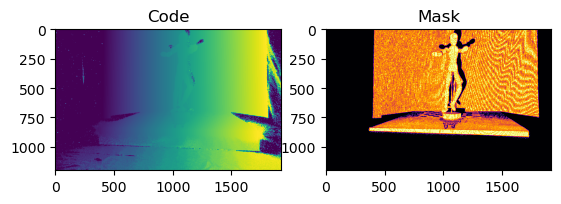

In [2]:
#This is a demonstration of The code and mask found using stereo correspondences
thresh = 0.01
code,mask = decode('manny-20231122T212235Z-001/manny/grab_0_u/frame_C0_',0,thresh)

plt.subplot(1, 2, 1)
plt.imshow(code, cmap='viridis')
plt.title('Code')
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='inferno')
plt.title('Mask')

plt.show()

#### USE TRIANGULATION TO GET A DENSE POINT CLOUD

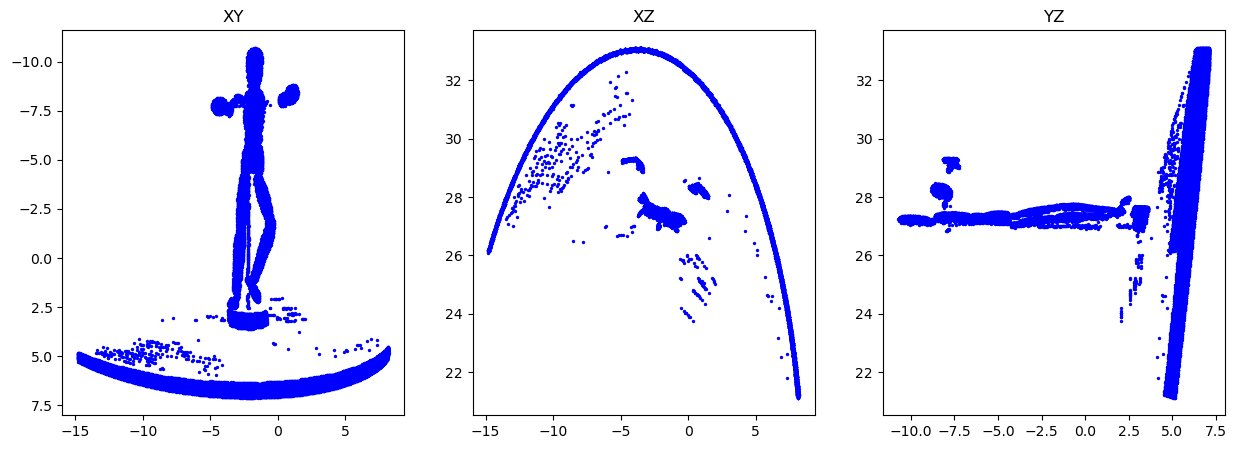

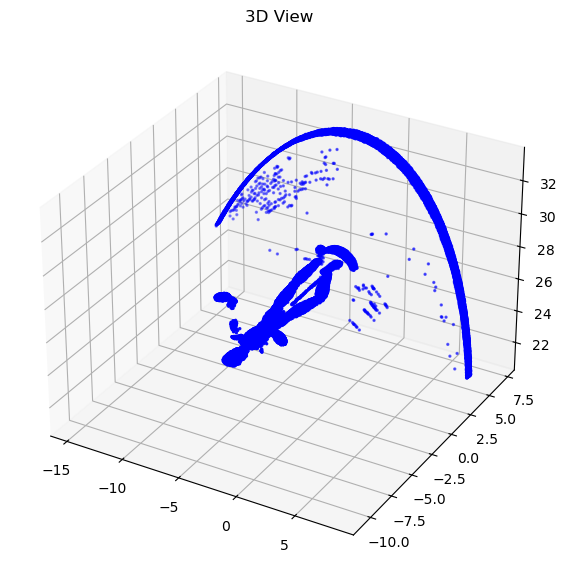

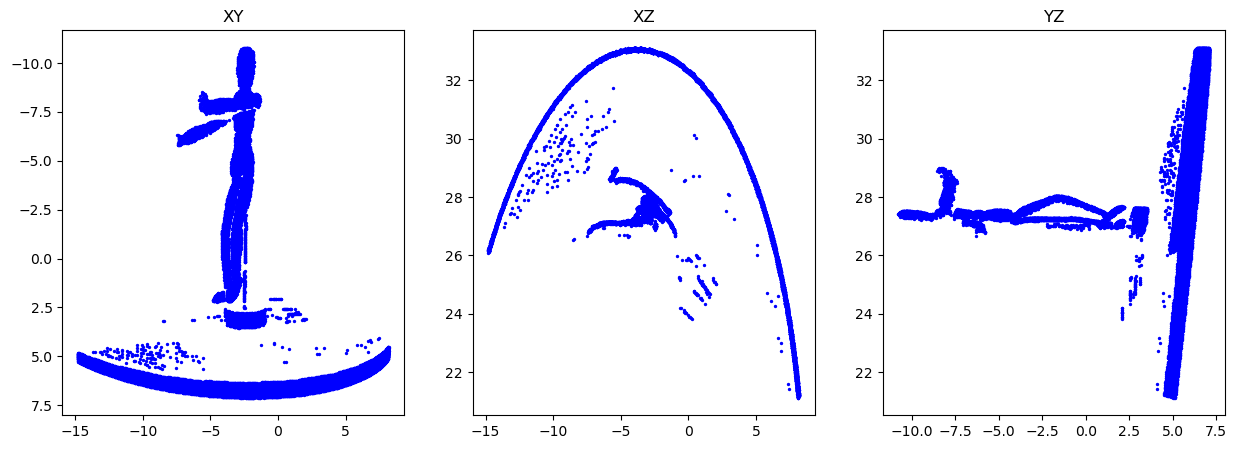

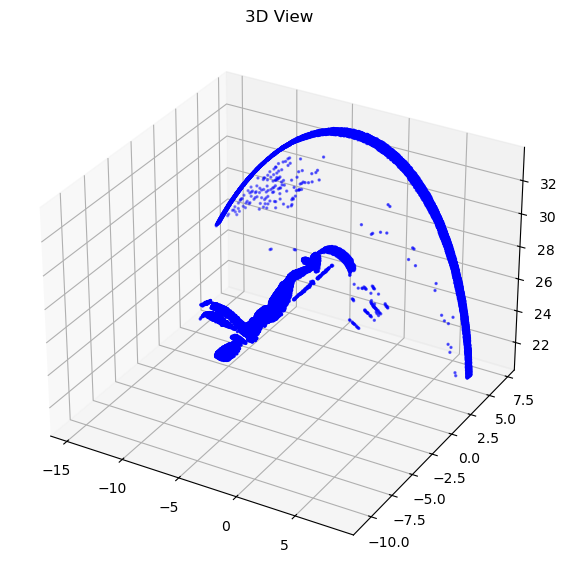

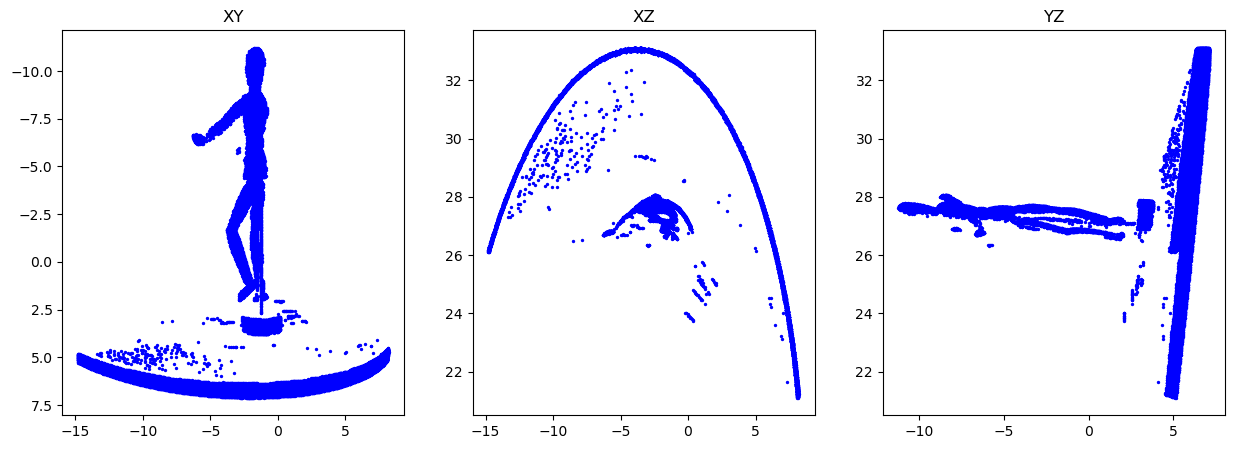

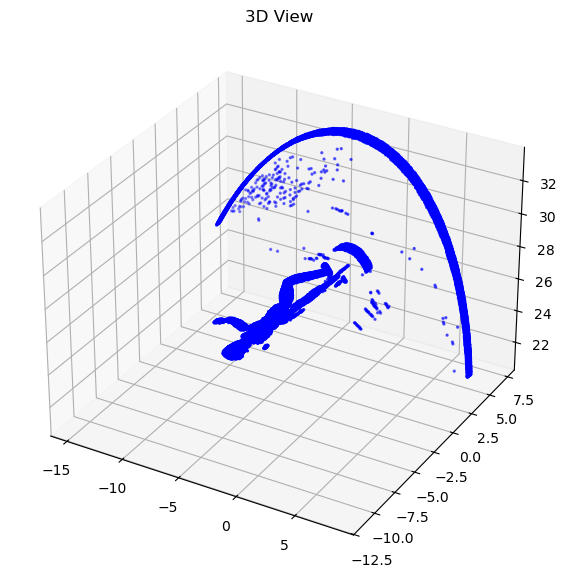

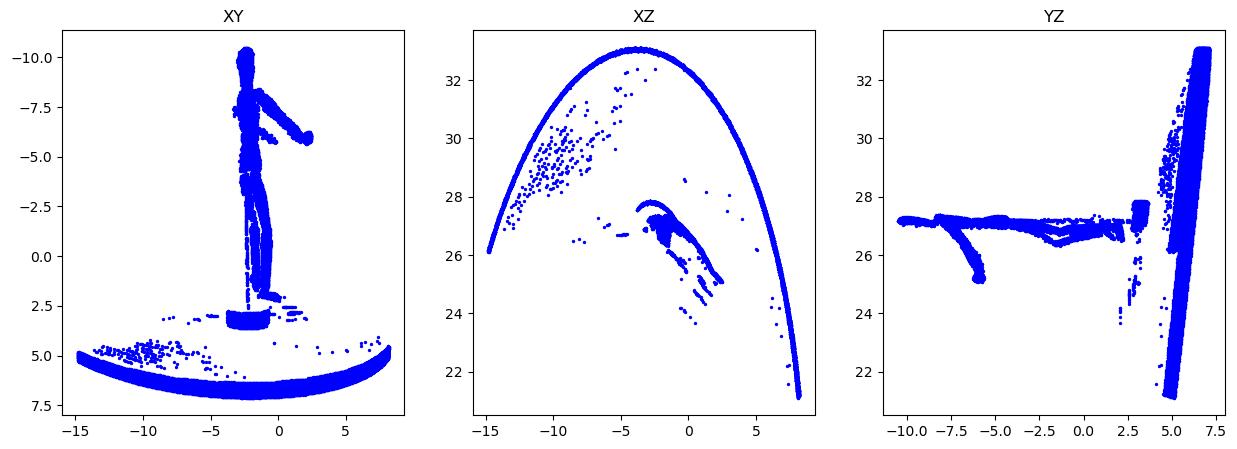

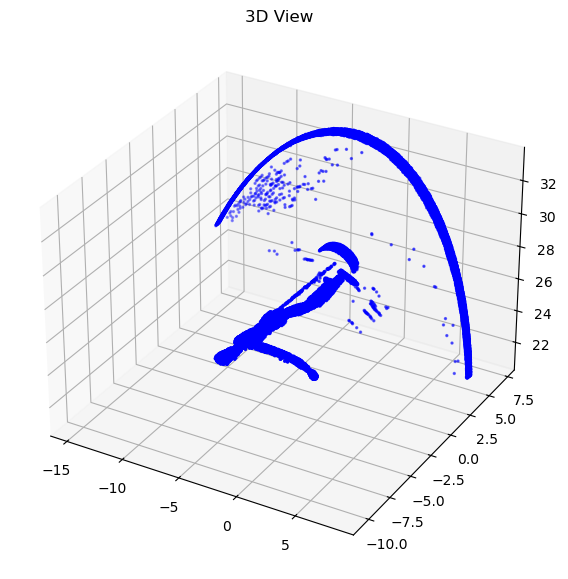

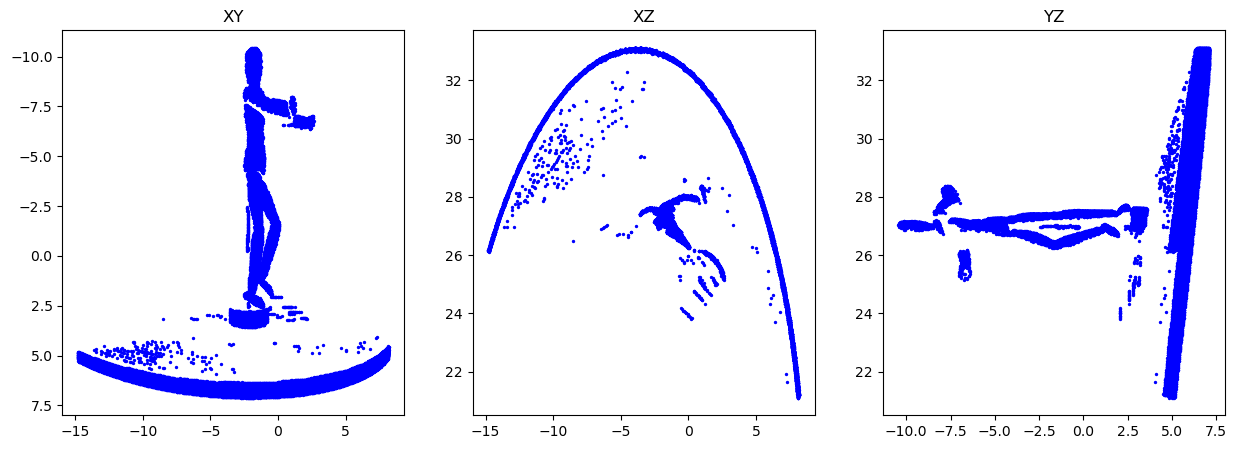

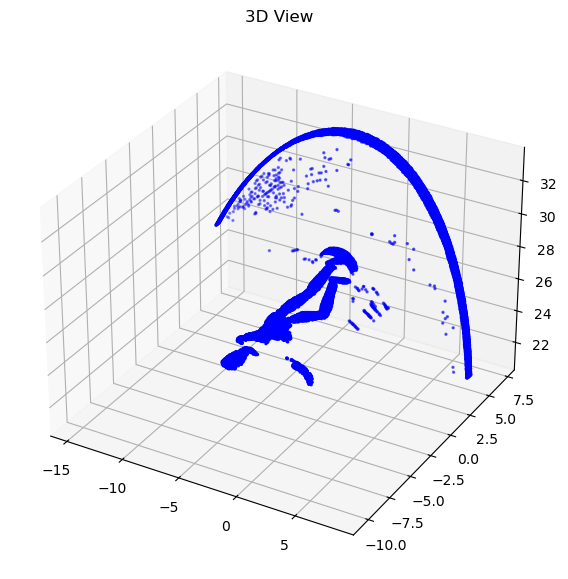

In [3]:
#I then used our reconstruct function to use triangulation and return
#a data point set for the 5 sets of images and displayed them.

imprefixL = 'manny-20231122T212235Z-001/manny/grab_0_u/frame_C1_'
imprefixR = 'manny-20231122T212235Z-001/manny/grab_0_u/frame_C0_'

threshold = 0.05

pts2La,pts2R,pts3a = reconstruct(imprefixL,imprefixR,threshold,camL,camR)


fig, ax = plt.subplots(1, 3, figsize=(15, 5))  #CHANGE SIZE
ax[0].scatter(pts3a[0, :], pts3a[1, :], c='blue', s= 2)
ax[0].invert_yaxis()
ax[0].set_title("XY")

ax[1].scatter(pts3a[0, :], pts3a[2, :], c='blue', s= 2)
ax[1].set_title("XZ")

ax[2].scatter(pts3a[1, :], pts3a[2, :], c='blue', s = 2)
ax[2].set_title("YZ")

plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pts3a[0, :], pts3a[1, :], pts3a[2, :], c='blue', s=2)
ax.set_title("3D View")

plt.show()



imprefixL = 'manny-20231122T212235Z-001/manny/grab_1_u/frame_C1_'
imprefixR = 'manny-20231122T212235Z-001/manny/grab_1_u/frame_C0_'
pts2Lb,pts2R,pts3b = reconstruct(imprefixL,imprefixR,threshold,camL,camR)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))  #CHANGE SIZE
ax[0].scatter(pts3b[0, :], pts3b[1, :], c='blue', s= 2)
ax[0].invert_yaxis()
ax[0].set_title("XY")

ax[1].scatter(pts3b[0, :], pts3b[2, :], c='blue', s= 2)
ax[1].set_title("XZ")

ax[2].scatter(pts3b[1, :], pts3b[2, :], c='blue', s = 2)
ax[2].set_title("YZ")

plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pts3b[0, :], pts3b[1, :], pts3b[2, :], c='blue', s=2)
ax.set_title("3D View")

plt.show()




imprefixL = 'manny-20231122T212235Z-001/manny/grab_2_u/frame_C1_'
imprefixR = 'manny-20231122T212235Z-001/manny/grab_2_u/frame_C0_'

pts2Lc,pts2R,pts3c = reconstruct( imprefixL,imprefixR,threshold,camL,camR)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))  #CHANGE SIZE
ax[0].scatter(pts3c[0, :], pts3c[1, :], c='blue', s= 2)
ax[0].invert_yaxis()
ax[0].set_title("XY")

ax[1].scatter(pts3c[0, :], pts3c[2, :], c='blue', s= 2)
ax[1].set_title("XZ")

ax[2].scatter(pts3c[1, :], pts3c[2, :], c='blue', s = 2)
ax[2].set_title("YZ")

plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pts3c[0, :], pts3c[1, :], pts3c[2, :], c='blue', s=2)
ax.set_title("3D View")

plt.show()




imprefixL = 'manny-20231122T212235Z-001/manny/grab_3_u/frame_C1_'
imprefixR = 'manny-20231122T212235Z-001/manny/grab_3_u/frame_C0_'

pts2Ld,pts2R,pts3d = reconstruct( imprefixL,imprefixR,threshold,camL,camR)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))  #CHANGE SIZE
ax[0].scatter(pts3d[0, :], pts3d[1, :], c='blue', s= 2)
ax[0].invert_yaxis()
ax[0].set_title("XY")

ax[1].scatter(pts3d[0, :], pts3d[2, :], c='blue', s= 2)
ax[1].set_title("XZ")

ax[2].scatter(pts3d[1, :], pts3d[2, :], c='blue', s = 2)
ax[2].set_title("YZ")

plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pts3d[0, :], pts3d[1, :], pts3d[2, :], c='blue', s=2)
ax.set_title("3D View")

plt.show()




imprefixL = 'manny-20231122T212235Z-001/manny/grab_4_u/frame_C1_'
imprefixR = 'manny-20231122T212235Z-001/manny/grab_4_u/frame_C0_'
pts2Le,pts2R,pts3e = reconstruct( imprefixL,imprefixR,threshold,camL,camR)

fig, ax = plt.subplots(1, 3, figsize=(15, 5)) 
ax[0].scatter(pts3e[0, :], pts3e[1, :], c='blue', s= 2)
ax[0].invert_yaxis()
ax[0].set_title("XY")

ax[1].scatter(pts3e[0, :], pts3e[2, :], c='blue', s= 2)
ax[1].set_title("XZ")

ax[2].scatter(pts3e[1, :], pts3e[2, :], c='blue', s = 2)
ax[2].set_title("YZ")

plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pts3e[0, :], pts3e[1, :], pts3e[2, :], c='blue', s=2)
ax.set_title("3D View")

plt.show()


#### CLEAN IT UP

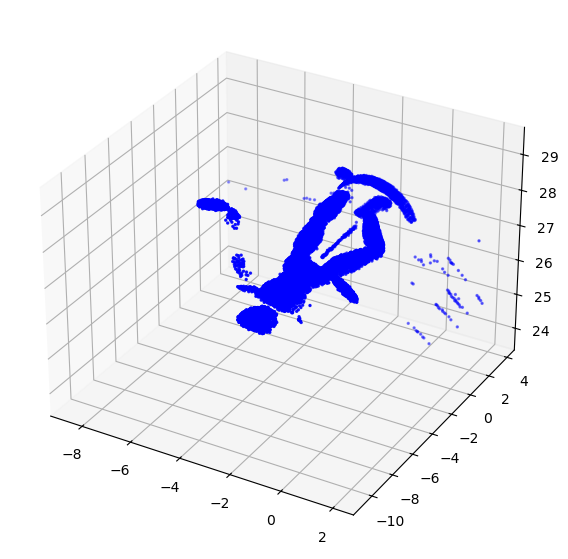

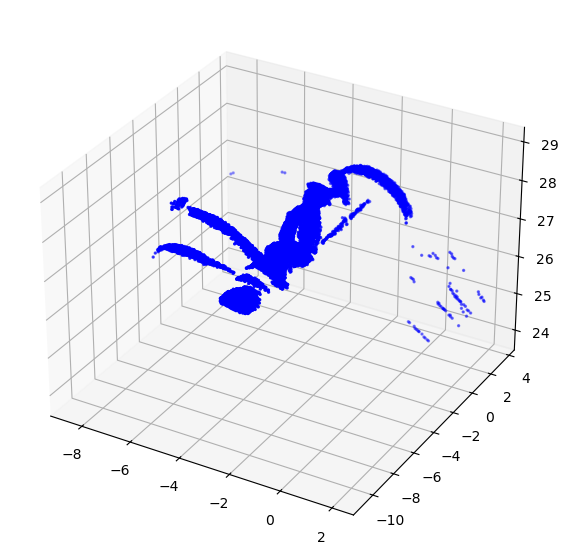

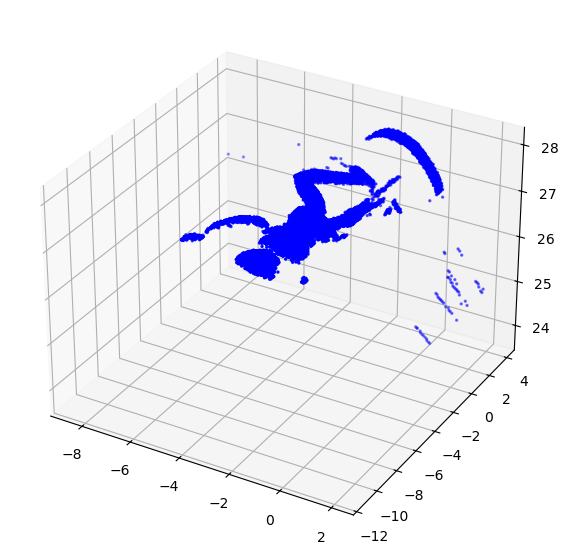

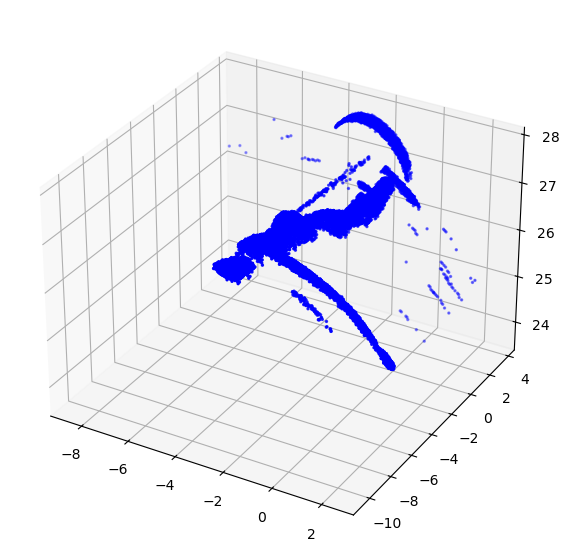

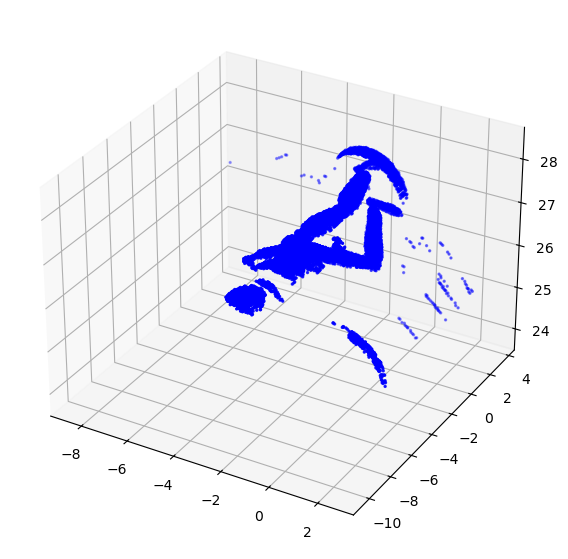

In [9]:
# I then pruned these data sets using boxlimits and returned
#the pruned data.
from scipy.spatial import Delaunay
import trimesh
from camutils import *


cleanpts3a, cleanpt2La = clean_points(pts3a, pts2La)
cleanpts3b, cleanpt2Lb = clean_points(pts3b, pts2Lb)
cleanpts3c, cleanpt2Lc = clean_points(pts3c, pts2Lc)
cleanpts3d, cleanpt2Ld = clean_points(pts3d, pts2Ld)
cleanpts3e, cleanpt2Le = clean_points(pts3e, pts2Le)

fig1 = plt.figure(figsize=(10, 7))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(cleanpts3a[0, :], cleanpts3a[1, :], cleanpts3a[2, :], c='blue', s= 2)
plt.show()

fig2 = plt.figure(figsize=(10, 7))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(cleanpts3b[0, :], cleanpts3b[1, :],cleanpts3b[2, :], c='blue', s= 2)
plt.show()

fig3 = plt.figure(figsize=(10, 7))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(cleanpts3c[0, :], cleanpts3c[1, :], cleanpts3c[2, :],c='blue', s= 2)
plt.show()

fig4 = plt.figure(figsize=(10, 7))
ax4 = fig4.add_subplot(111, projection='3d')
ax4.scatter(cleanpts3d[0, :], cleanpts3d[1, :], cleanpts3d[2, :], c='blue', s= 2)
plt.show()

fig5 = plt.figure(figsize=(10, 7))
ax5 = fig5.add_subplot(111, projection='3d')
ax5.scatter(cleanpts3e[0, :], cleanpts3e[1, :], cleanpts3e[2, :], c='blue', s= 2)
plt.show()



#### MESH IT

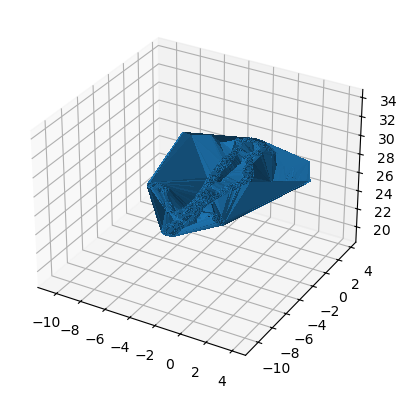

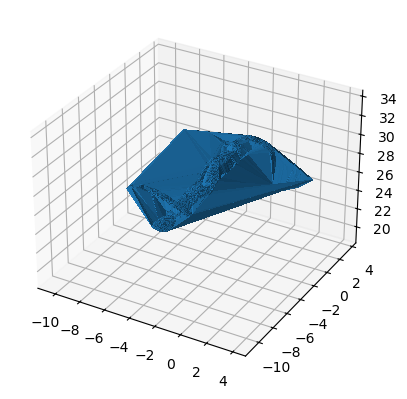

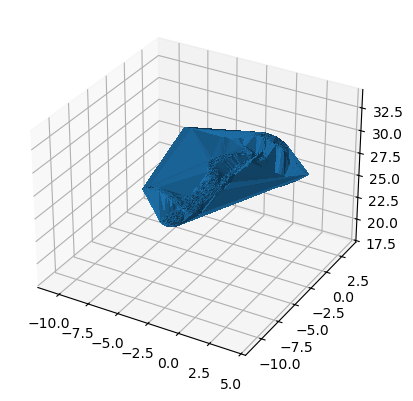

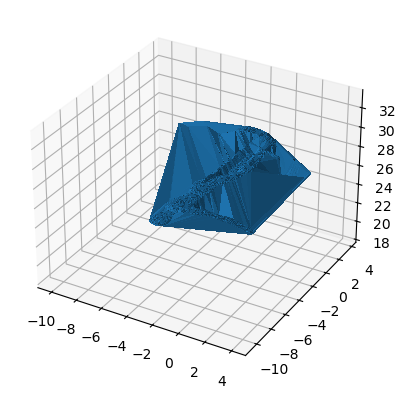

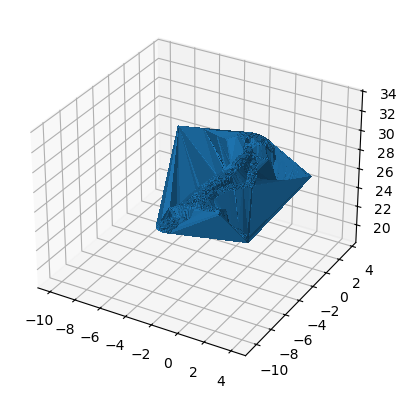

In [10]:
#After, i created raw triangles for the points and 
#plotted them alongside the 3D points.
tria = Delaunay(cleanpt2La.T)
plot3D(cleanpts3a, tria.simplices)

trib = Delaunay(cleanpt2Lb.T)
plot3D(cleanpts3b, trib.simplices)

tric = Delaunay(cleanpt2Lc.T)
plot3D(cleanpts3c, tric.simplices)

trid = Delaunay(cleanpt2Ld.T)
plot3D(cleanpts3d, trid.simplices)

trie = Delaunay(cleanpt2Le.T)
plot3D(cleanpts3e, trie.simplices)


#### CLEAN IT UP

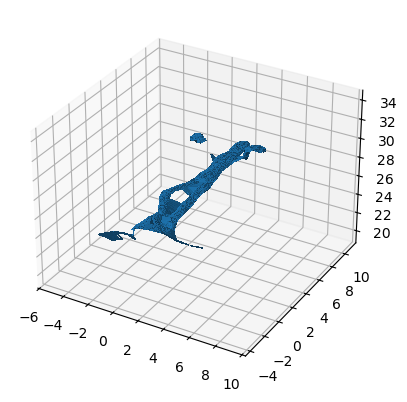

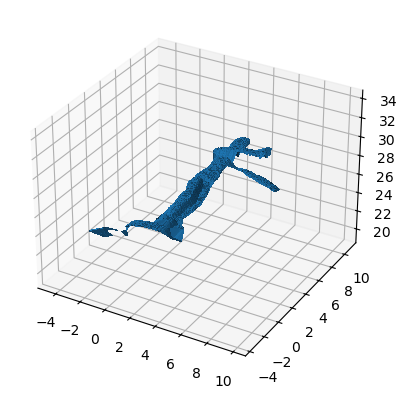

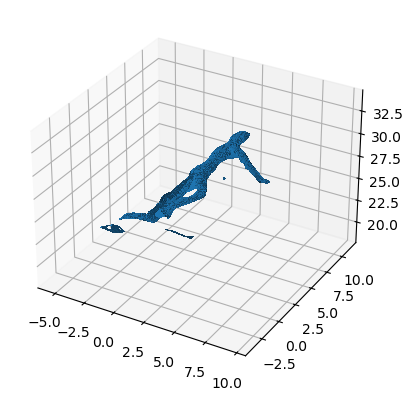

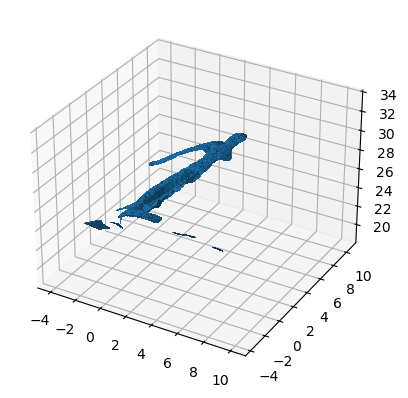

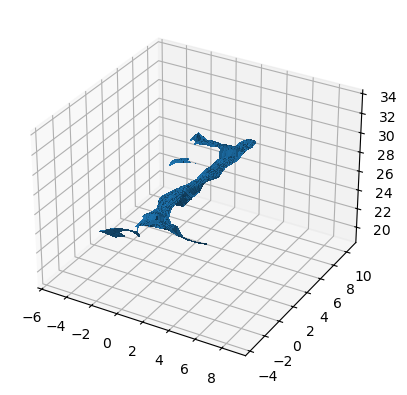

In [11]:
#I then both rotated the points as well as 
#pruned any triangles that were too far off the 
#figure.

fpts3a, rtria = mesh_points(cleanpts3a, cleanpt2La)
plot3D(fpts3a, rtria)
fpts3b, rtrib = mesh_points(cleanpts3b, cleanpt2Lb)
plot3D(fpts3b, rtrib)
fpts3c, rtric = mesh_points(cleanpts3c, cleanpt2Lc)
plot3D(fpts3c, rtric)
fpts3d, rtrid = mesh_points(cleanpts3d, cleanpt2Ld)
plot3D(fpts3d, rtrid)
fpts3e, rtrie = mesh_points(cleanpts3e, cleanpt2Le)
plot3D(fpts3e, rtrie)


In [21]:
#Here I save the 5 meshes as obj files to merge them in Blender.
clouds = [fpts3a, fpts3b, fpts3c, fpts3d, fpts3e]
tris = [rtria, rtrib, rtric, rtrid, rtrie]

for i, (points, faces) in enumerate(zip(clouds, tris)):
    mesh = trimesh.Trimesh(vertices=points.T, faces=faces)
    filename = f"Mobject_{i+1}.obj"
    mesh.export(filename)

    print(f"Saved {filename}")

Saved Mobject_1.obj
Saved Mobject_2.obj
Saved Mobject_3.obj
Saved Mobject_4.obj
Saved Mobject_5.obj


#### MERGE MESHES

I saved the 5 renders as obj files, and then imported them into Blender, merging them.

#### CLEAN IT UP

After merging, a little clean up was done to remove excess vertices and faces.

#### RENDERING

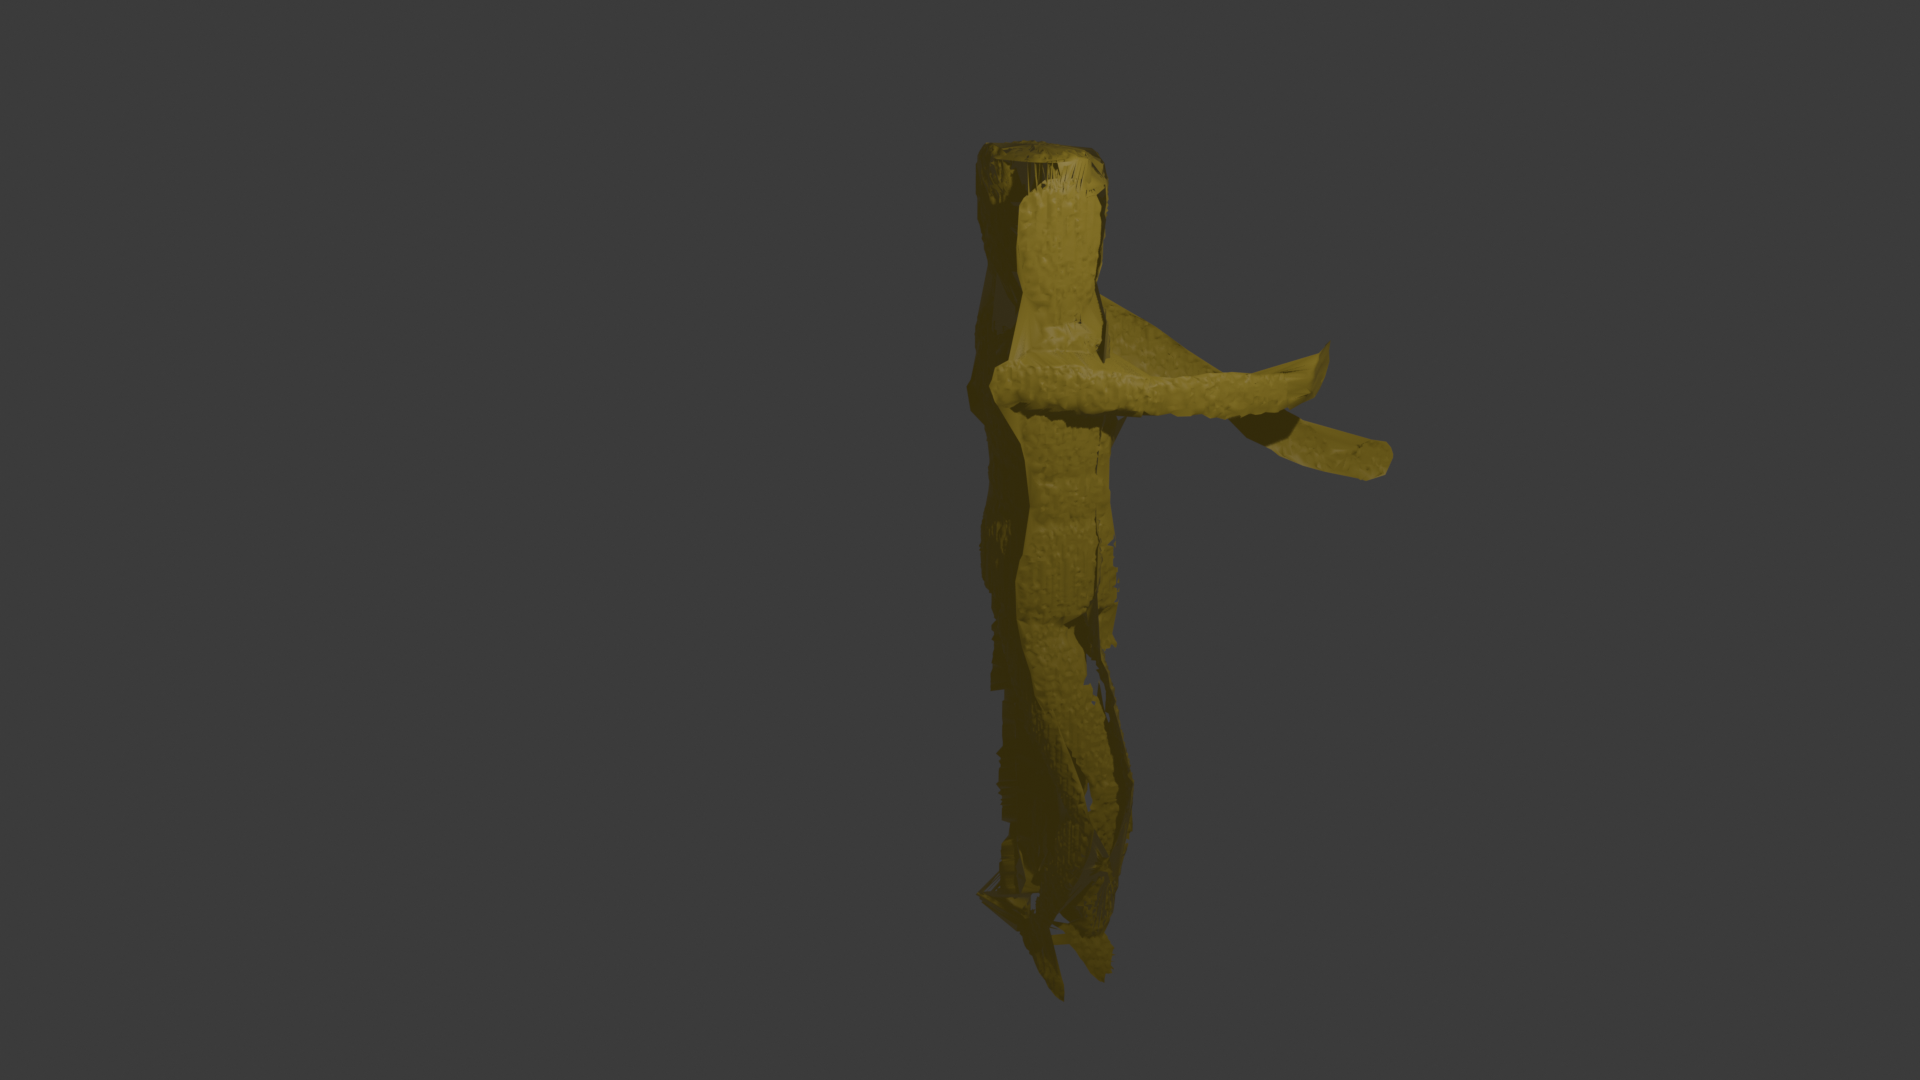

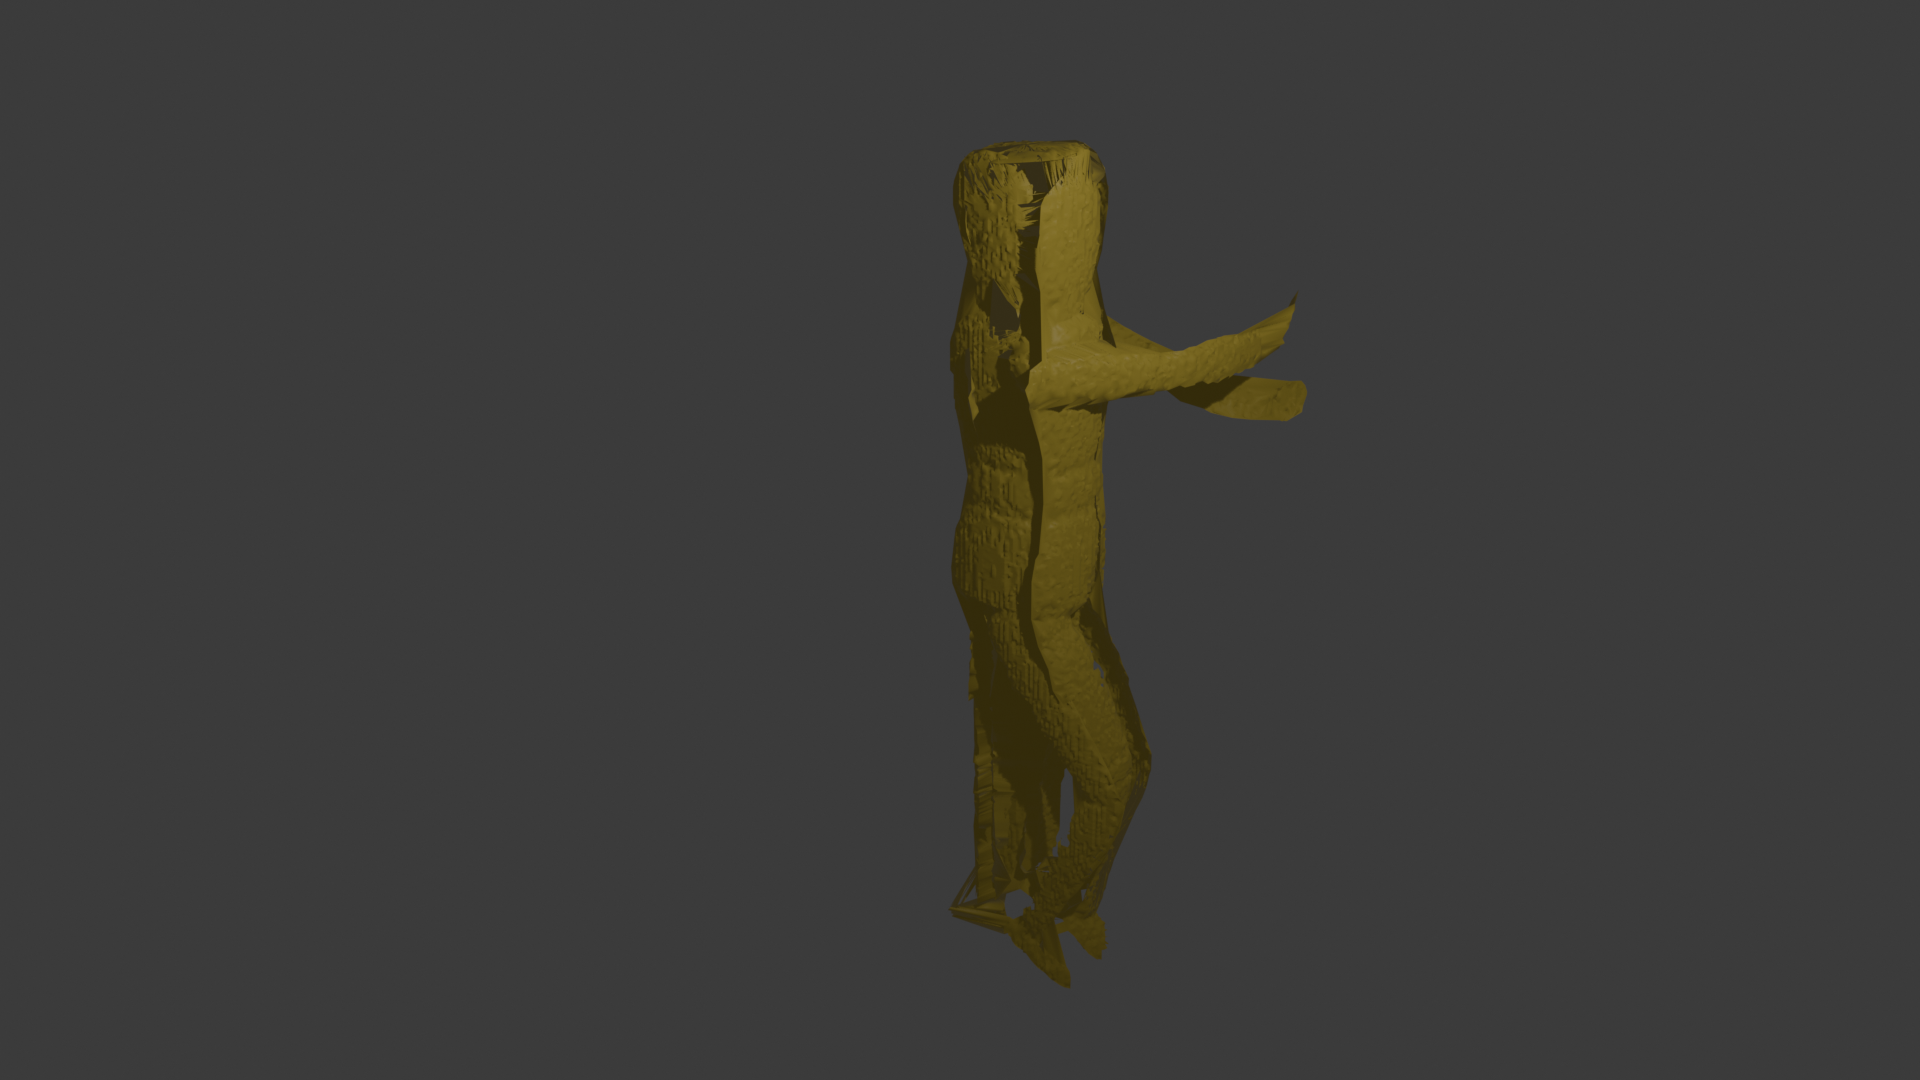

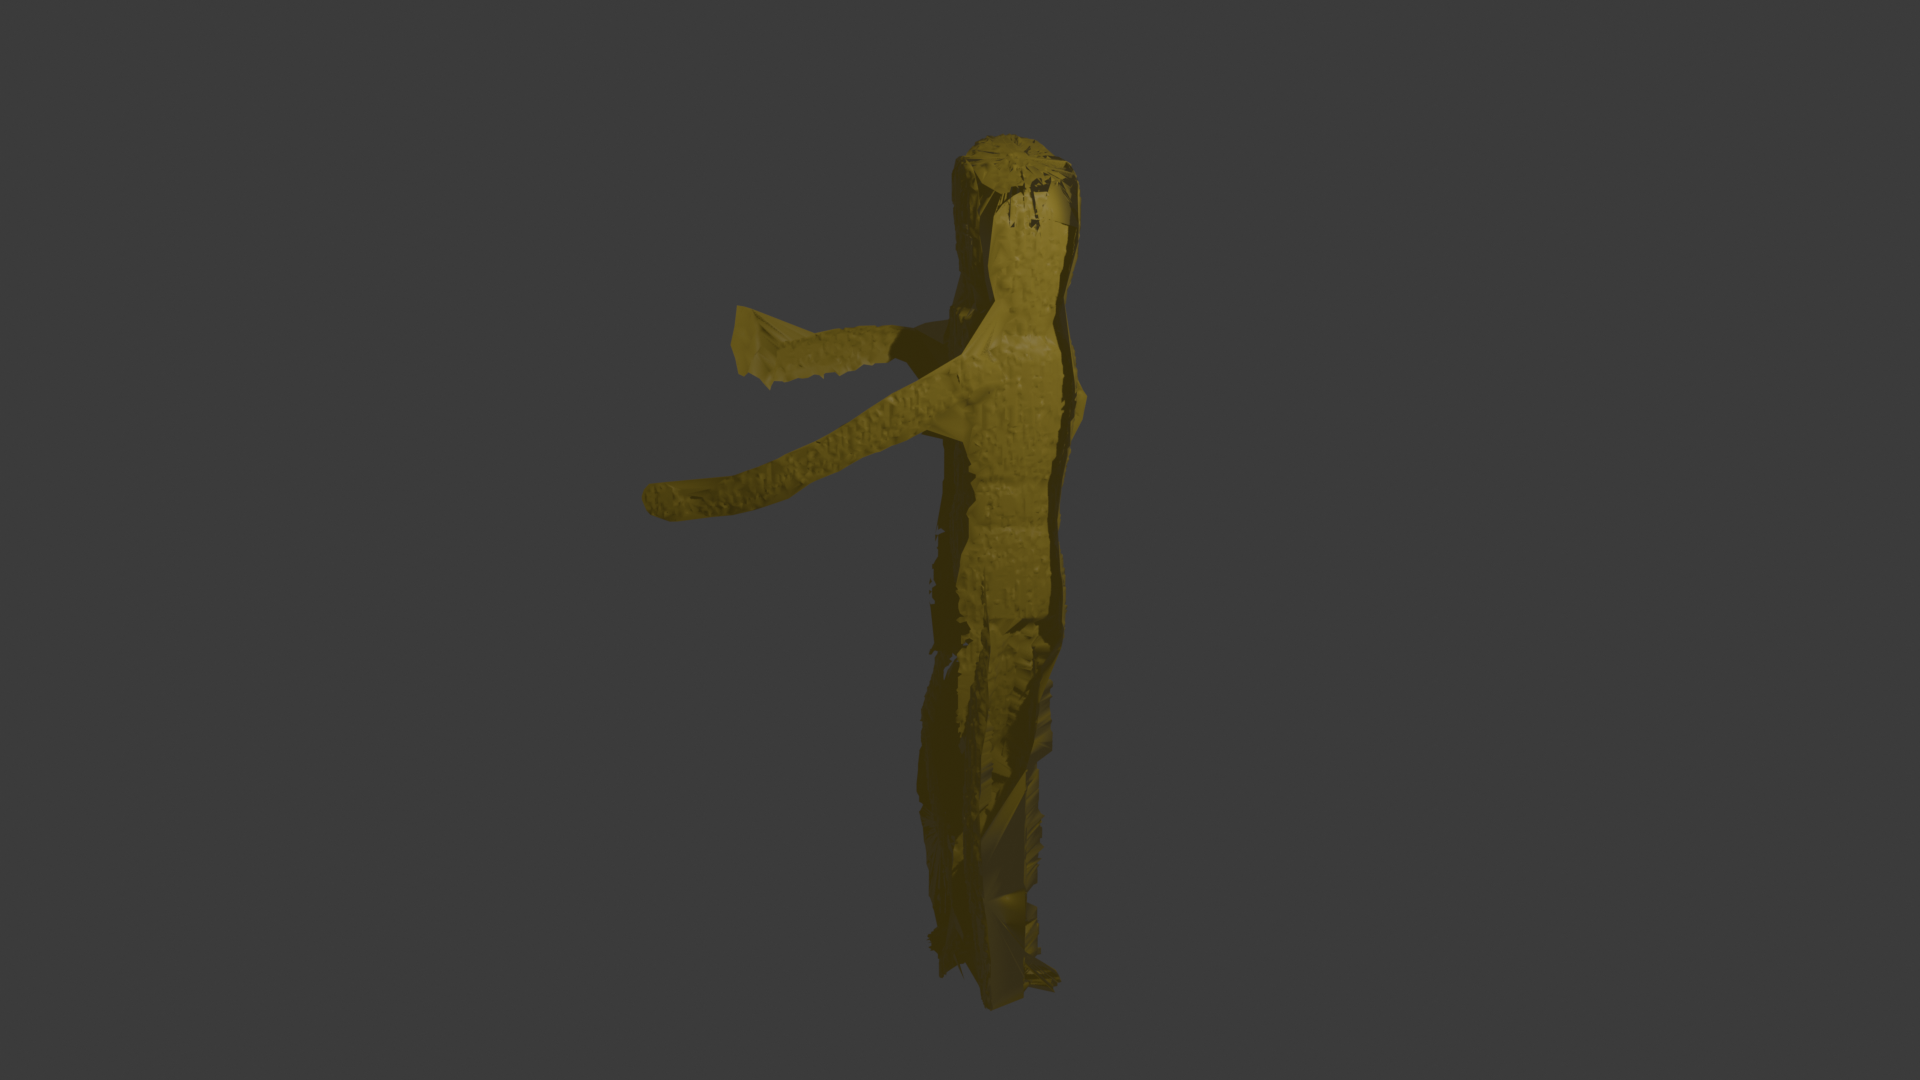

Render Video Attached To Assignment.